## Challenge 2 (Third Challenge):
Read carefully. Ask questions for clarification where need be.

Find a link below to some data files to work with. This is a set of csv files from a daily scrapping of the corona dot help website tracking the numbers in the covid-19 pandemic.

There are two sets of files named covid* and worldwide*
Both sets of files have two versions at two different times of the day: around 11pm and early in the morning. 

The tasks:
1. Organise the files into 4 groups (show formula + number of files each).
a. covid* 11pm+
b. world* 11pm+
c. covid* other time
d. world* other time
2. Using 1b above, how many cases did the US and Germany each record in April?
3. Using 1b above, how many cases did the US and Germany each record in May?
4. Using 1c above, how many cases did Italy and Russia each record in April?
5. Using 1c above, how many cases did Italy and Russia each record in May?

#Kicker
Using 1b, how many cases were recorded by US, Italy, China, Russia, Germany in April + May?

Max plots: 4. I will be looking at the numbers.

## This is an exercise in Wrangling so I am not going to bother about making any plots. I will dwell on the sorting and cleaning moves as well as the numbers associated with each question.

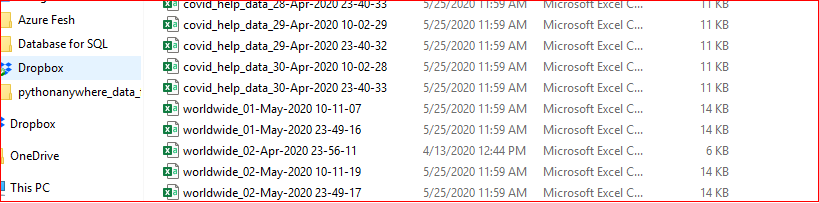

In [1]:
import IPython
IPython.display.Image("files.png")

In [2]:
#Import Needed libraries
import os
import pandas as pd

In [3]:
#Assemble all csv files in the folder
#Using the os module, we find all files ending with 'csv'. 
data = [line for line in os.listdir() if line.endswith('csv')]
print(f"There are {len(data)} csv files in the folder")

There are 181 csv files in the folder


In [4]:
#To sort the files holding the covid* and world* groups, we find files whose name have their starting characters in it
cov = [line for line in data if line.startswith('cov')]
ww = [line for line in data if line.startswith('world')]

#For perspective and to ensure we are in line, the sum of both groups should be equal to all csv files
len(cov), len(ww), len(cov) + len(ww), len(cov) + len(ww) == len(data)

(93, 88, 181, True)

In [5]:
#Then we find in each group, the files for the different months
#It's simple, going by the naming of the files, each one has at least the first 3 strings of the month name
#Let's make two groups each of covid* and world* groups corresponding to april and may.
cov_Apr = [line for line in cov if 'Apr' in line]
cov_May = [line for line in cov if 'May' in line]
ww_Apr = [line for line in ww if 'Apr' in line]
ww_May = [line for line in ww if 'May' in line]

In [6]:
#For this section, remember the variable names. We will use them down the line

#Find the 23 Hours(11pm) and Other times for the world* group. Again, the clues are in the name. '23' present or not.
#For May
ww_May23 = [line for line in ww_May if '23' in line.split()[-1]]
ww_Mayother = [line for line in ww_May if not '23' in line.split()[-1]]

#For Apr
ww_Apr23 = [line for line in ww_Apr if '23' in line.split()[-1]]
ww_Aprother = [line for line in ww_Apr if not '23' in line.split()[-1]]


#Find the 23 Hours(11pm) and Other times for the covid* group
#For May
cov_May23 = [line for line in cov_May if '23' in line.split()[-1]]
cov_Mayother = [line for line in cov_May if not '23' in line.split()[-1]]

#For Apr
cov_Apr23 = [line for line in cov_Apr if '23' in line.split()[-1]]
cov_Aprother = [line for line in cov_Apr if not '23' in line.split()[-1]]


# Let's summarize the numbers we have for each group
print(f"Covid*\nApril 11pm > {len(cov_May23) + len(cov_Apr23)}.\nApril Other Time > {len(cov_Mayother) + len(cov_Aprother)}")
print(f"\nWorld*\nMay 11pm > {len(ww_May23) + len(ww_Apr23)}.\nMay Other Time > {len(ww_Mayother) + len(ww_Aprother)}")

Covid*
April 11pm > 46.
April Other Time > 47

World*
May 11pm > 43.
May Other Time > 45


### Notice that so far, I have not read a single file. It is a choice. I wanted to sort and organise the files first.
- #Let's take a look at how a SAMPLE of the first csv file of each group looks. This will affect how we decide to work and what columns we wanna use.

In [7]:
#Apr 23 hours aka 11pm
df = pd.read_csv(ww_Apr23[0])
df.sample(5)

,Country,Total confirmed cases,Total deaths,Confirmed recoveries,Cases confirmed today,Deaths today,Recoveries confirmed today
160,mongolia,14,0,2,0,0,0
56,egypt,865,58,201,86,6,22
111,brunei,133,1,56,2,0,4
27,malaysia,"3,116",50,767,208,5,122
83,réunion,308,0,40,27,0,0


In [8]:
#Apr Other hours
df = pd.read_csv(ww_Aprother[0])
df.sample(5)

,Country,Total confirmed cases,Total deaths,Confirmed recoveries,Cases confirmed today,Deaths today,Recoveries confirmed today
138,djibouti,40,0,0,7,0,0
9,turkey,"18,135",356,415,"2,456",79,82
165,libya,11,1,0,1,1,0
5,france,"59,105","5,387","12,428","2,116","1,355","1,493"
142,bermuda,35,0,11,3,0,1


In [9]:
#May 23 hours aka 11pm
df = pd.read_csv(ww_May23[0])
df.sample(5)

,Country,Total confirmed,Total_confirmed_today,Total_deaths,Total_deaths_today,Total_Recoveries,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today
29,qatar,"14,096",687,12,2,"1,436",64,"12,648",72 (1%),"12,648",0%,"97,726","3,226"
32,united-arab-emirates,"13,038",557,111,6,"2,543",114,"10,384",1 (0%),"10,384",1%,"1,200,000","78,000"
86,hong-kong,"1,040",2,4,0,859,13,177,4 (2%),177,0%,"154,989",0
160,haiti,81,5,8,2,8,0,65,0 (0%),65,10%,827,51
6,turkey,"122,392","2,188","3,258",84,"53,808","4,922","65,326","1,480 (2%)","65,326",3%,"1,075,048","41,431"


In [10]:
#May Other hours
df = pd.read_csv(ww_Mayother[0])
df.sample(5)

,Country,Total confirmed,Total_confirmed_today,Total_deaths,Total_deaths_today,Total_Recoveries,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today
161,mozambique,76,0,0,0,12,0,64,0 (0%),64,0%,"1,896",0
31,united-arab-emirates,"13,038",557,111,6,"2,543",114,"10,384",1 (0%),"10,384",1%,"1,122,000",0
186,saint-lucia,17,0,0,0,15,0,2,0 (0%),2,0%,446,0
142,ethiopia,133,2,3,0,66,7,64,0 (0%),64,2%,"18,754",912
66,croatia,"2,076",14,69,2,"1,348",60,659,20 (3%),659,3%,"36,221","1,745"


In [11]:
#May 23 hours aka 11pm
df = pd.read_csv(ww_May23[0])
df.sample(5)

,Country,Total confirmed,Total_confirmed_today,Total_deaths,Total_deaths_today,Total_Recoveries,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today
201,seychelles,11,0,0,0,6,0,5,0 (0%),5,0%,0,0
105,guatemala,599,14,16,0,66,1,517,5 (1%),517,3%,"7,200",0
133,congo-brazzaville,229,9,9,0,25,6,195,0 (0%),195,4%,0,0
125,montenegro,322,0,7,0,214,11,101,2 (2%),101,2%,"6,864",0
7,russia,"114,431","7,933","1,169",96,"13,220","1,601","100,042","2,300 (2%)","100,042",1%,"3,700,000","210,000"


In [12]:
#May Other hours
df = pd.read_csv(ww_Mayother[0])
df.sample(5)

,Country,Total confirmed,Total_confirmed_today,Total_deaths,Total_deaths_today,Total_Recoveries,Total_Recoveries_today,Active_confirmed,Critical,Mortality_close,Mortality_confirmed,Total_tests,Total_tests_today
46,colombia,"6,507",300,293,15,"1,439",28,"4,775",118 (2%),"4,775",5%,"104,657","9,572"
155,uganda,83,2,0,0,52,0,31,0 (0%),31,0%,"29,279",0
196,gambia,12,1,1,0,8,0,3,0 (0%),3,8%,401,0
28,japan,"14,088",352,430,36,"2,460",561,"11,198",308 (3%),"11,198",3%,"165,609","5,063"
158,haiti,81,5,8,2,8,0,65,0 (0%),65,10%,827,51


In [13]:
#Some numbers come with commas in them. I could use the 'thousand' argument while reading pandas 
#However, I want to throw in some measure of control by myself by defining how I want the numbers handled
def number(df):
    #April entries has two different names for total confirmed so I convert that column with try/except to get both
    try: #Apr format
        #overwrite the rows of these columns with their respective values replacing comma with nothin and converting to int
        df['total_confirmed_cases'] = [int(line.replace(',','')) for line in df['total_confirmed_cases']]
        df['cases_confirmed_today'] = [int(line.replace(',','')) for line in df['cases_confirmed_today']]
    except:#May format
        df['total_confirmed'] = [int(line.replace(',','')) for line in df['total_confirmed']]
        df['total_confirmed_today'] = [int(line.replace(',','')) for line in df['total_confirmed_today']]
    
    #Change the date to datetime extracting the date
    #Ended up not using this but I am leaving it around all the same
    df['date'] = [pd.to_datetime(line).date() for line in df['date']]
    
    return df

## Question 2: Using 1b above (world* 11pm+), how many cases did the US and Germany each record in April?

## The Flow
- Again, I refuse to read and merge all the files. Reason is simple: They have varying types and formats
- For each group, I read a signle csv file, extract the country I'm interested in and keep piling the df in a list
- I ensure the dfs I am concating have same shape and shape column names
- Since I ensured the last line, I can then concat them (merge them one under the other), reset the index and drop theirs.
- I am using the total comfirmed for each country which is given for each day. This is the total from inception.
- With the above, I can take the first total on record and get the difference from the last on record. This give me total for that period.

In [14]:
#Disable the copy warning on this one
pd.options.mode.chained_assignment = None

#Open two different lists to hold the dataframes from reading and extracting the needed country
us_a, germany_a = [], []

#Let's go with the world* apr taken at 23 hours. Rememebr that group from above?
for line in ww_Apr23:
    #The US numbers
    df = pd.read_csv(line) #For each item in the group, read the csv file
    df.columns = [line.lower().replace(' ', '_') for line in df.columns] #convert colName to lower and replace space with _
    df = df[df['country'] == 'united-states'] #Pick the country we are interested in from the df
    try: 
        #For the files where confirmed col names is 'total_confirmed_cases'. Let's get the 'cases_confirmed_today' also
        df = df[['country', 'total_confirmed_cases', 'cases_confirmed_today']]
        df['date'] = line.split()[0].split('_')[1] #add a date col stripping it from the name of the file
        df['time'] = line.split()[1][:-4] #ditto for time
        us_a.append(df)
    except:
        #In case the total confirmed columns is name 'total_confirmed'. We grab that
        df = df[['country', 'total_confirmed', 'total_confirmed_today']]
        df['date'] = line.split()[0].split('_')[1]
        df['time'] = line.split()[1][:-4]
        #To ensure consistent naming, we rename the col to same format as the above dataframe for easy concat
        df.columns = ['country', 'total_confirmed_cases', 'cases_confirmed_today','date','time' ]
        us_a.append(df)
        
    #We repeat the above for Germany
    #I know. Should've been a function. I am leaving it like this for repettion and hopefully clarity for new learners.
    df = pd.read_csv(line)
    df.columns = [line.lower().replace(' ', '_') for line in df.columns]
    df = df[df['country'] == 'germany']
    try: 
        #For confirmed col names 'total_confirmed_cases'
        df = df[['country', 'total_confirmed_cases', 'cases_confirmed_today']]
        df['date'] = line.split()[0].split('_')[1]
        df['time'] = line.split()[1][:-4]
        germany_a.append(df)
    except:
        #For confirmed col names 'total_confirmed_cases'
        df = df[['country', 'total_confirmed', 'total_confirmed_today']]
        df['date'] = line.split()[0].split('_')[1]
        df['time'] = line.split()[1][:-4]
        #rename the cols to same format as the above dataframe for easy concat
        df.columns = ['country', 'total_confirmed_cases', 'cases_confirmed_today', 'date','time' ]
        germany_a.append(df)

#We can now concat the list of dataframes for each country and convert our numbers with the fucn defined earlier
us_data_a = pd.concat(us_a).reset_index(drop=True)
us_data_a = number(us_data_a)

germany_data_a = pd.concat(germany_a).reset_index(drop=True)
germany_data_a = number(germany_data_a)

In [15]:
#To the last part of our logic/flow. Get the total for the month by getting difference of last day and first day
#The total for the month of April will be last date's record minus the first date's
germany_april_start = germany_data_a.total_confirmed_cases.tolist()[0]
germany_april_end = germany_data_a.total_confirmed_cases.tolist()[-1]

#Option2: Going with cases confirmed per day column.
#Notice that will return a different number. It's expected as the end of day for each region is relative to time.
germany_april = germany_data_a.cases_confirmed_today.sum()

print(f"Total cases for Germany in April is {germany_april_end - germany_april_start:,}")

#Since there are 13 items on the list, total for the month of April will be last date's record minus the first date's
us_april_start = us_data_a.total_confirmed_cases.tolist()[0]
us_april_end = us_data_a.total_confirmed_cases.tolist()[-1]

#Option2: Going with cases confirmed per day column.
us_april = us_data_a.cases_confirmed_today.sum()

print(f"Total cases for US in April is {us_april_end - us_april_start:,}")
print(f"\nPer 'Case Confirmed Today' col:\nGermany April confirmed> {germany_april:,}.\nUS April confirmed> {us_april:,}.")

Total cases for Germany in April is 78,215
Total cases for US in April is 851,822

Per 'Case Confirmed Today' col:
Germany April confirmed> 45,008.
US April confirmed> 563,709.


## Question 3: Using 1b above (world* 11pm+), how many cases did the US and Germany each record in May? 

- exact same flow as question 2

In [16]:
us_m, germany_m = [], []
for line in ww_May23:
    #US
    df = pd.read_csv(line)
    df.columns = [line.lower().replace(' ', '_') for line in df.columns]
    df = df[df['country'] == 'united-states']

    df = df[['country', 'total_confirmed', 'total_confirmed_today']]
    df['date'] = line.split()[0].split('_')[1]
    df['time'] = line.split()[1][:-4]
    #rename the cols to same format as the above dataframe for easy concat
    us_m.append(df)
        
    #Germany
    df = pd.read_csv(line)
    df.columns = [line.lower().replace(' ', '_') for line in df.columns]
    df = df[df['country'] == 'germany']
   
    df = df[['country', 'total_confirmed', 'total_confirmed_today']]
    df['date'] = line.split()[0].split('_')[1]
    df['time'] = line.split()[1][:-4]
    #rename the cols to same format as the above dataframe for easy concat
    germany_m.append(df)
        
us_data = pd.concat(us_m).reset_index(drop=True)
us_data = number(us_data)
germany_data = pd.concat(germany_m).reset_index(drop=True)
germany_data = number(germany_data)

In [17]:
#Total for the month of April will be last date's record minus the first date's
germany_may_start = germany_data.total_confirmed.tolist()[0]
germany_may_end = germany_data.total_confirmed.tolist()[-1]

#Style2 Going with cases confirmed per day
germany_may = germany_data.total_confirmed_today.sum()

print(f"Total cases for Germany in May is {germany_may_end - germany_may_start:,}")

#Since there are 13 items on the list, total for the month of April will be last date's record minus the first date's
us_may_start = us_data.total_confirmed.tolist()[0]
us_may_end = us_data.total_confirmed.tolist()[-1]

#Style2 Going with cases confirmed per day
us_may = us_data.total_confirmed_today.sum()

print(f"Total cases for US in May is {us_may_end - us_may_start:,}")
print(f"\nPer 'Cases Confirmed Today' col:\nGermany May confirmed> {germany_may:,}.\nUS April confirmed> {us_may:,}.")

Total cases for Germany in May is 16,251
Total cases for US in May is 555,285

Per 'Cases Confirmed Today' col:
Germany May confirmed> 17,319.
US April confirmed> 585,611.


## Question 4: Using 1c above (covid* other time), how many cases did Italy and Russia each record in April?
- Same flow as 2 and 3 minus converting the numbers. Our numbers are good here
- The column of interest here is 'infected'

In [18]:
italy, russia = [], []
for line in cov_Aprother:
    #Italy
    df = pd.read_csv(line)
    df.columns = [line.lower().replace(' ', '_') for line in df.columns]
    df = df[df['countries'] == 'Italy']
    
    #Take cols we need
    df = df[['countries', 'infected']]
    df['date'] = line.split()[0].split('_')[1]
    df['time'] = line.split()[1][:-4]
    italy.append(df)
    
    #Russia
    df = pd.read_csv(line)
    df.columns = [line.lower().replace(' ', '_') for line in df.columns]
    df = df[df['countries'] == 'Russia']
    
    #Take cols we need
    df = df[['countries', 'infected']]
    df['date'] = line.split()[0].split('_')[-1]
    df['time'] = line.split()[1][:-4]
    russia.append(df)
        
italy_data = pd.concat(italy).reset_index(drop=True)
russia_data = pd.concat(russia).reset_index(drop=True)

In [19]:
#total for the month of April will be last date's record minus the first date's
italy_april_start = italy_data.infected.tolist()[0]
italy_april_end = italy_data.infected.tolist()[-1]

print(f"Total cases for Italy in April is {italy_april_end - italy_april_start:,}")

#total for the month of April will be last date's record minus the first date's
russia_april_start = russia_data.infected.tolist()[0]
russia_april_end = russia_data.infected.tolist()[-1]

print(f"Total cases for Russia in April is {russia_april_end - russia_april_start:,}")

Total cases for Italy in April is 88,349
Total cases for Russia in April is 102,950


# Question 5: Using 1c above (covid* other time), how many cases did Italy and Russia each record in May?
- Same logic/flow from question 4 and working with May

In [20]:
italy, russia = [], []
for line in cov_Mayother:
    #Italy
    df = pd.read_csv(line)
    df.columns = [line.lower().replace(' ', '_') for line in df.columns]
    df = df[df['countries'] == 'Italy']
    
    #Take cols we need
    df = df[['countries', 'infected']]
    df['date'] = line.split()[0].split('_')[1]
    df['time'] = line.split()[1][:-4]
    italy.append(df)
    
    #Russia
    df = pd.read_csv(line)
    df.columns = [line.lower().replace(' ', '_') for line in df.columns]
    df = df[df['countries'] == 'Russia']
    
    #Take cols we need
    df = df[['countries', 'infected']]
    df['date'] = line.split()[0].split('_')[-1]
    df['time'] = line.split()[1][:-4]
    russia.append(df)
        
italy_data = pd.concat(italy).reset_index(drop=True)
# italy_data = number_v2(italy_data)
russia_data = pd.concat(russia).reset_index(drop=True)
# russia_data = number_v2(russia_data)

In [21]:
#Since there are 13 items on the list, total for the month of April will be last date's record minus the first date's
italy_may_start = italy_data.infected.tolist()[0]
italy_may_end = italy_data.infected.tolist()[-1]

print(f"Total cases for Italy in May is {italy_may_end - italy_may_start:,}")

#Since there are 13 items on the list, total for the month of April will be last date's record minus the first date's
russia_may_start = russia_data.infected.tolist()[0]
russia_may_end = russia_data.infected.tolist()[-1]

print(f"Total cases for Russia in April is {russia_may_end - russia_may_start:,}")

Total cases for Italy in May is 24,395
Total cases for Russia in April is 238,996


## Kicker

## The Flow
- We make a list of the countries we are interested in (Notice I added some extra countries plus my country Nigeria)
- We define a kicker() taking 3: the list of countires we are lookign for, the list of apr file and list of may files. Remember them from somewhere before.
- Same idea of reading each file to find the country we want, put the df from each file into a list of dfs, concat them and get the list. We do this for each of the months.
- Finally we add both months to get our total tally for the country.

In [22]:
def kicker(target_list, apr=ww_Apr23, may=ww_May23):
    for target in target_list: #For each country on on list
        #make an empty list for each month to hold the df of numbers from each file read 
        data_apr = []
        data_may = []
        
        #For each file in the month of april
        for day in apr:
            df = pd.read_csv(day)
            df.columns = [line.lower().replace(' ', '_') for line in df.columns]
            df = df[df['country'] == target]
            try: 
                #For confirmed col names
                df = df[['country', 'total_confirmed_cases']]
                data_apr.append(df)
            except:
                #For confirmed col names 'total_confirmed_cases'
                df = df[['country', 'total_confirmed']]
                #rename the cols to same format as the above dataframe for easy concat
                df.columns = ['country', 'total_confirmed_cases']
                data_apr.append(df)
        
        #Concat the files in the list of dfs
        c_data_apr = pd.concat(data_apr).reset_index(drop=True) #reset index and drop the original ones from each
        
        #convert the col holding our numbers replacing commas and making them ints
        c_data_apr['total_confirmed_cases']=[int(line.replace(',','')) for line in c_data_apr['total_confirmed_cases']]
        c_data_apr_start = c_data_apr.total_confirmed_cases.tolist()[0] #get first record of total confirmed
        c_data_apr_end = c_data_apr.total_confirmed_cases.tolist()[-1] #get last
        c_data_apr_total = c_data_apr_end - c_data_apr_start #Get their difference
        
        #Repeat for the month of may
        for day in may:
            df = pd.read_csv(day)
            df.columns = [line.lower().replace(' ', '_') for line in df.columns]
            df = df[df['country'] == target]
            try: 
                #For confirmed col names
                df = df[['country', 'total_confirmed_cases']]
                data_may.append(df)
            except:
                #For confirmed col names 'total_confirmed_cases'
                df = df[['country', 'total_confirmed']]
                #rename the cols to same format as the above dataframe for easy concat
                df.columns = ['country', 'total_confirmed_cases']
                data_may.append(df)
        
        #Repeat the concat and number column conversion
        c_data_may = pd.concat(data_may).reset_index(drop=True)
        c_data_may['total_confirmed_cases']=[int(line.replace(',','')) for line in c_data_may['total_confirmed_cases']]
        c_data_may_start = c_data_may.total_confirmed_cases.tolist()[0]
        c_data_may_end = c_data_may.total_confirmed_cases.tolist()[-1]
        c_data_may_total = c_data_may_end - c_data_may_start
        
        #print the result. Remember we are in a loop of listed countries. The first just got crunche and 2nd will begin etc
        print(f"Total confirmed for {target} in April and May is {c_data_apr_total+c_data_may_total:,}")

In [23]:
us = []
germany = []
china = []
italy = []
russia = []
targets = ['united-states', 'germany', 'china', 'italy', 'russia', 'brazil', 'india', 'nigeria']
#add more countires on the list as you like

In [24]:
#We call the kicker funciton passing as target list of countries 'targets'
kicker(targets)

Total confirmed for united-states in April and May is 1,407,107
Total confirmed for germany in April and May is 94,466
Total confirmed for china in April and May is 623
Total confirmed for italy in April and May is 112,651
Total confirmed for russia in April and May is 333,000
Total confirmed for brazil in April and May is 348,572
Total confirmed for india in April and May is 133,598
Total confirmed for nigeria in April and May is 7,417
